In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 기본
palette1 = sns.color_palette('hls',8)
# 범주형
categorical = sns.color_palette('Set3', 10)
# 연속형1
sbys = sns.color_palette('RdBu', 10)
# 연속형2
sequential = sns.color_palette("GnBu", 10)

sequential2 = sns.color_palette("BuGn", 10)

In [4]:
kaida = pd.read_csv('/Users/ksjo/Documents/kaida.csv')
query = pd.read_csv('/Users/ksjo/Documents/naver_query.csv')
demension = pd.read_csv('/Users/ksjo/Documents/demension.csv')

In [5]:
query = query.drop_duplicates()
demension = demension.drop(['MyUnknownColumn'],axis=1)
demension = demension.drop_duplicates()

In [6]:
kaida['sales_type'] = kaida['sales_type'].str.replace(' 법인','법인') 
kaida = kaida.drop_duplicates()
kaida['value'] = kaida['value'].str.replace(',','')
kaida['value'] = kaida['value'].astype(int)
kaida['month'] = kaida['month'].str.replace('월','')
kaida['month'] = kaida['month'].astype(int)
kaida['year'] = kaida['year'].astype(object)
kaida = kaida[kaida['model']!='Total']

# age컬럼 이름 변경
kaida['age'] = kaida['age'].str.replace('~19','10')
kaida['age'] = kaida['age'].str.replace('20~29','20')
kaida['age'] = kaida['age'].str.replace('30~39','30')
kaida['age'] = kaida['age'].str.replace('40~49','40')
kaida['age'] = kaida['age'].str.replace('50~59','50')
kaida['age'] = kaida['age'].str.replace('60~69','60')
kaida['age'] = kaida['age'].str.replace('70~','70')
kaida['age'] = kaida['age'].str.replace('-','0')
kaida['age'] = kaida['age'].astype(int)

kaida.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240048 entries, 0 to 271954
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   brand       240048 non-null  object
 1   model       240048 non-null  object
 2   value       240048 non-null  int64 
 3   sales_type  240048 non-null  object
 4   age         240048 non-null  int64 
 5   month       240048 non-null  int64 
 6   year        240048 non-null  object
dtypes: int64(3), object(4)
memory usage: 14.7+ MB


In [7]:
# 데이터셋
kaida_2021 = kaida[kaida['year']==2021]
benz = kaida[kaida['brand']=='Mercedes-Benz']
benz_2021 = benz[benz['year']==2021]
benz_2021_4 = benz_2021[(benz_2021['month']==4)]

---

---

In [8]:
kaida['sales_type'].unique()

array(['개인-남자', '개인-여자', '법인'], dtype=object)

#### 벤츠 해당 월 등록대수 & 점유율

In [9]:
# 벤츠 4월 등록대수 

In [10]:
benz_4 = benz_2021_4.copy()
benz_4=benz_4.drop(columns='age')
benz_4.groupby('month').agg(sum)
# 4월 등록대수는 4112대

,value
month,
4,4112


In [11]:
# 상위 5개 브랜드의 4월 시장점유율

In [63]:
# 2021년 판매량 상위 5개 외제차 브랜드

kaida_5 = kaida_2021.copy()
kaida_5=kaida_5.drop(columns=['age','month'])
kaida_5.groupby('brand').agg(sum).sort_values('value',ascending=False).head(5)

,value
brand,
BMW,28212
Mercedes-Benz,14722
Audi,8575
MINI,4678
Volkswagen,3892


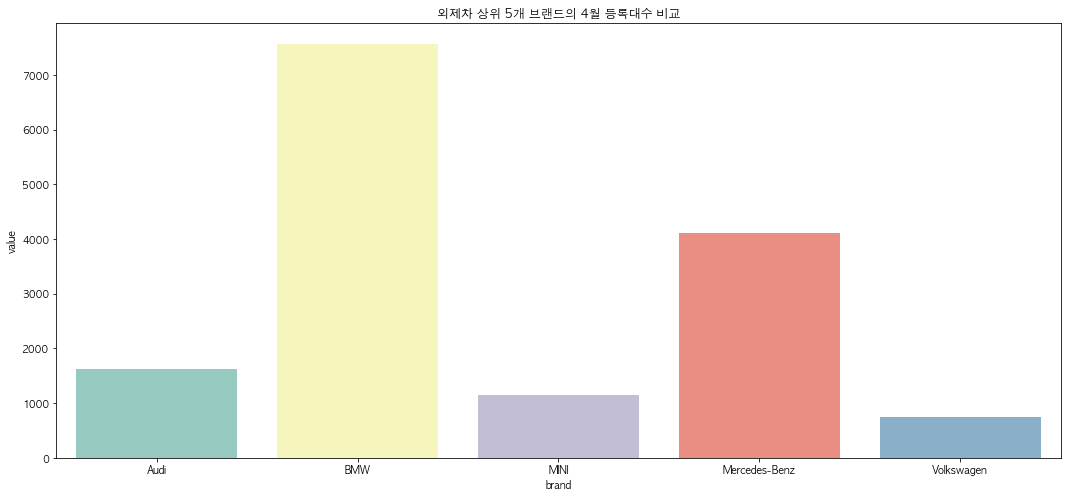

In [13]:
kaida_major = kaida_2021.copy()

kaida_major = kaida_major[kaida_major['brand'].str.contains("Mercedes-Benz|BMW|Audi|Volkswagen|MINI")]
kaida_major = kaida_major[kaida_major['month']==4].groupby('brand').agg(sum)
plt.figure(figsize=(18,8))
sns.barplot(x=kaida_major.index,y='value',data=kaida_major,palette=categorical)
plt.title('외제차 상위 5개 브랜드의 4월 등록대수 비교')
plt.show()

In [14]:
# 4월 자사의 판매량은 4112대로 전체 외제차시장에서 BMW 다음.

#### 해당 등록대수 구성(1.성별 퍼센테이지 그래프 / 2. 해당 성별의 연령대 구성 비율 그래프)

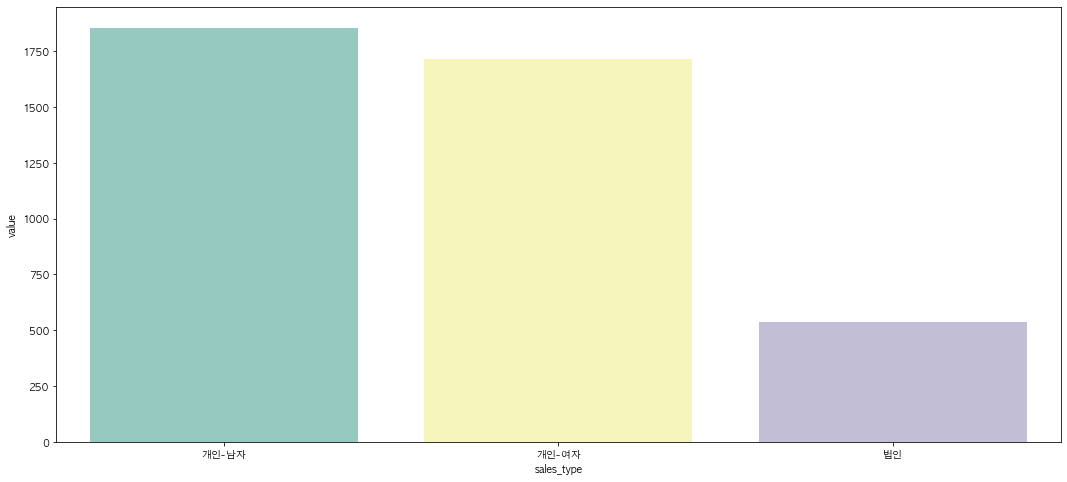

In [15]:
benz_type=benz_2021_4.groupby('sales_type').agg(sum)
plt.figure(figsize=(18,8))
sns.barplot(x=benz_type.index,y='value',data=benz_type,palette=categorical)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

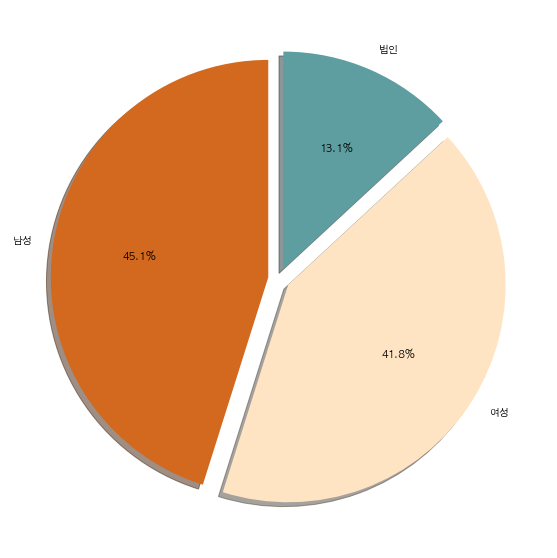

In [16]:
plt.figure(figsize=(20,10))
explode = (0.05, 0.05, 0.05)
colors = ['chocolate','bisque','cadetblue']
labels= ['남성','여성','법인']
plt.pie(benz_type['value'],explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)
plt.show

In [17]:
# 자사의 4월 차량 판매는 대체로 남성과 여성이 비슷한 비중을 차지하였음. 

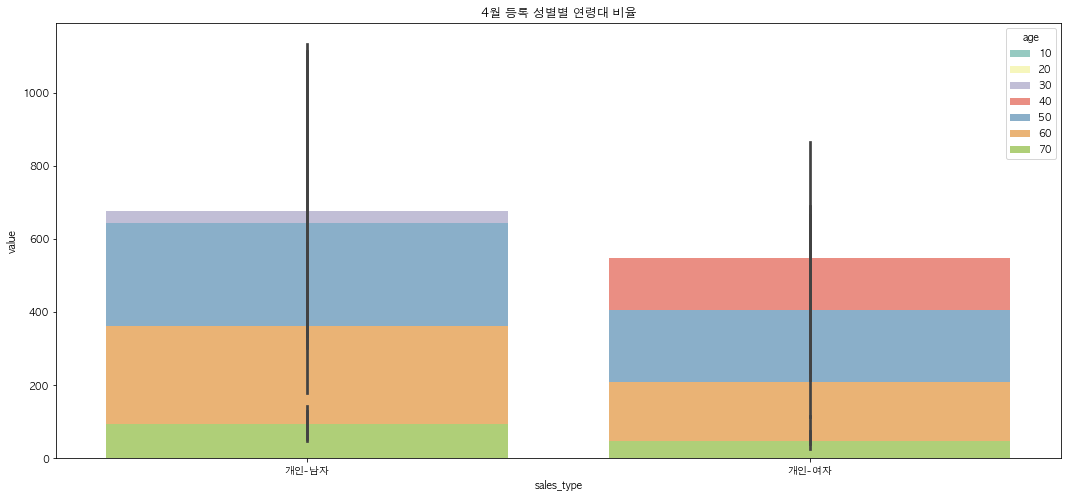

In [18]:
# 4월 등록 남녀 연령대 비율(age)
plt.figure(figsize=(18,8))
sns.barplot(x='sales_type',y='value',hue='age',estimator=np.sum,data=benz_2021_4[benz_2021_4['sales_type']!='법인'],palette=categorical,dodge=False)
plt.title('4월 등록 성별별 연령대 비율')
plt.show()

In [19]:
# 남녀공통 자사의 제품을 가장 많이 구매한 연령대는 50대, 그리고 60대
# 남성 40대 데이터가 없어서 데이터베이스를 찾아봤는데, 데이터베이스에 2021년에 40대 남성 데이터가 없다. 데이터 자체 하자 있음.
# 2020년 데이터에는 법인데이터만 있음.

#### 주요 연령대의 선호 세그먼트 (연료타입 / 사이즈 / 타입(해치백,쿠페))

In [20]:
# + 주요연령대에서 가장 많이 팔린차는 무엇인가.

In [21]:
benz_50man = benz_2021_4.copy()

benz_50man=benz_50man[(benz_50man['age']==50)&(benz_50man['sales_type']=='개인-남자')]
benz_50man=benz_50man.drop(columns=['month'])
benz_50man.groupby(['age','sales_type','model']).agg(sum).sort_values('value',ascending=False).head(5)

value
age sales_type model              
50  개인-남자      E250            163
               E3504MATIC       89
               GLE4504MATIC     77
               E300e4MATIC      37
               CLS4504MATIC     28

In [22]:
benz_50woman = benz_2021_4.copy()

benz_50woman=benz_50woman[(benz_50woman['age']==50)&(benz_50woman['sales_type']=='개인-여자')]
benz_50woman=benz_50woman.drop(columns=['month'])
benz_50woman.groupby(['age','sales_type','model']).agg(sum).sort_values('value',ascending=False).head(5)

value
age sales_type model              
50  개인-여자      E250            102
               E3504MATIC       51
               A220sedan        27
               CLS4504MATIC     26
               E300e4MATIC      23

In [23]:
# kaida + demension

In [24]:
demension.rename(columns={'Brand':'brand'},inplace=True)
demension.rename(columns={'model_pk':'model'},inplace=True)

demension

In [25]:
kaida

,brand,model,value,sales_type,age,month,year
0,BMW,218dGranCoupe,0,개인-남자,10,1,2021
1,BMW,520,1,개인-남자,10,1,2021
2,Bentley,ContinentalGTV8,0,개인-남자,10,1,2021
3,Honda,CR-VHybrid,0,개인-남자,10,1,2021
4,Mercedes-Benz,E250,1,개인-남자,10,1,2021
...,...,...,...,...,...,...,...
271950,BMW,XC70D4,0,법인,0,12,2016
271951,BMW,XC70D5,0,법인,0,12,2016
271952,BMW,XC90D5AWD,34,법인,0,12,2016
271953,BMW,XC90T6AWD,11,법인,0,12,2016


In [38]:
demension['model'].unique()

array(['118dUrban', '120dSport', '200', ..., '혼다파일럿', '아우디RS이트론GT',
       '한국토요타렉서스LC500컨버터블'], dtype=object)

In [47]:
kaida_de = pd.merge(kaida,demension,how='left',on=['model','brand'])
kaida_de.tail(30)

,brand,model,value,sales_type,age,month,year,Model,car_country,car_fuel,car_seg,car_seg_size,car_seg_com
240018,BMW,S60D4,6,법인,0,12,2016,NaN,NaN,NaN,NaN,NaN,NaN
240019,BMW,S60D5,0,법인,0,12,2016,NaN,NaN,NaN,NaN,NaN,NaN
240020,BMW,S60T5,5,법인,0,12,2016,NaN,NaN,NaN,NaN,NaN,NaN
240021,BMW,S60T6,0,법인,0,12,2016,NaN,NaN,NaN,NaN,NaN,NaN
240022,BMW,S60CCD4,0,법인,0,12,2016,NaN,NaN,NaN,NaN,NaN,NaN
240023,BMW,S60CCD4AWD,0,법인,0,12,2016,NaN,NaN,NaN,NaN,NaN,NaN
240024,BMW,S80D4,0,법인,0,12,2016,NaN,NaN,NaN,NaN,NaN,NaN
240025,BMW,S80T5,0,법인,0,12,2016,NaN,NaN,NaN,NaN,NaN,NaN
240026,BMW,S90D5AWD,4,법인,0,12,2016,NaN,NaN,NaN,NaN,NaN,NaN
240027,BMW,S90T5,10,법인,0,12,2016,NaN,NaN,NaN,NaN,NaN,NaN


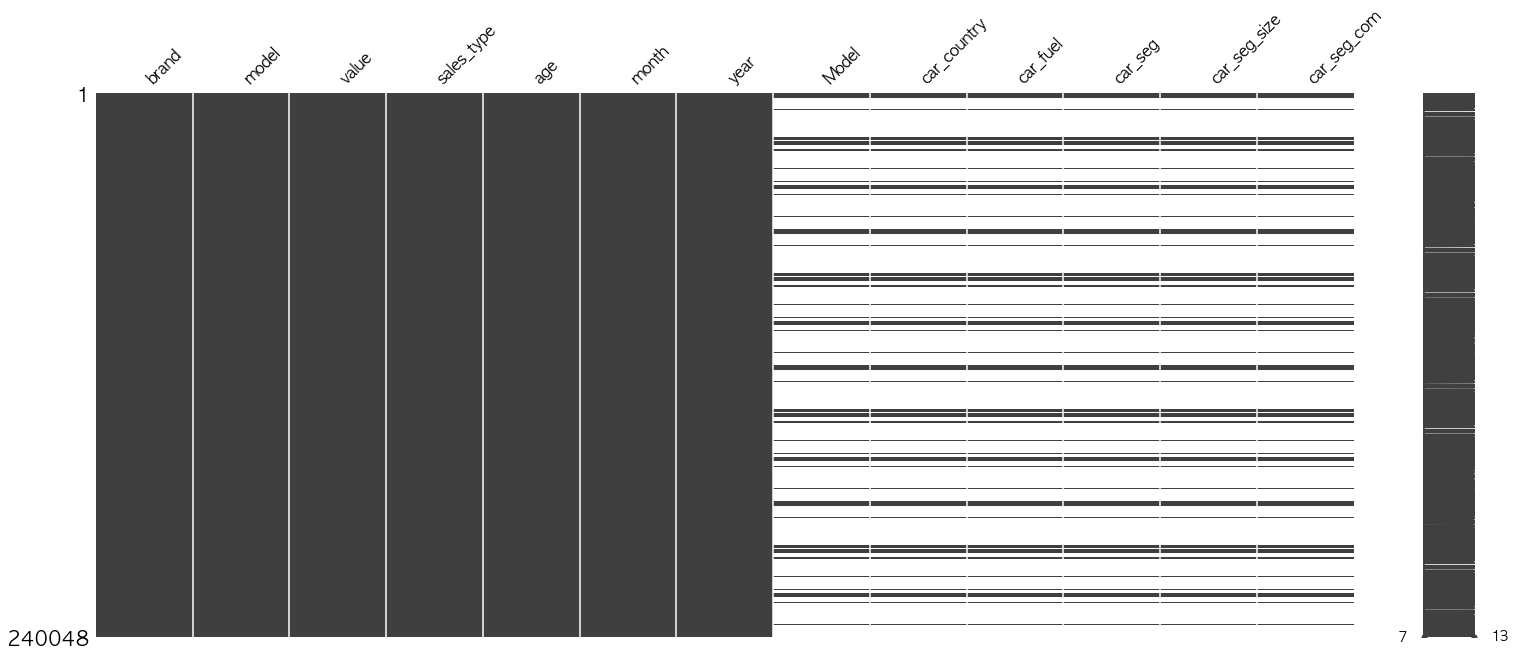

In [48]:
import missingno as msno
msno.matrix(kaida_de)
plt.show()

In [60]:
kaida_merge = kaida.copy()
kaida_merge=kaida_merge.drop(columns='brand')
kaida_dem = pd.merge(kaida_merge,demension,how='left',on=['model'])
kaida_dem.tail(60)

,model,value,sales_type,age,month,year,Model,brand,car_country,car_fuel,car_seg,car_seg_size,car_seg_com
239988,PanameraGTS,0,법인,0,12,2016,Panamera,Porsche,독일,가솔린,대형,세단,performance_s
239989,Dawn,0,법인,0,12,2016,Dawn,Rolls-Royce,영국,가솔린,대형,세단,performance_s
239990,Ghost,1,법인,0,12,2016,Ghost,Rolls-Royce,영국,가솔린,대형,SUV,mobility_s
239991,GhostEWB,2,법인,0,12,2016,Ghost,Rolls-Royce,영국,가솔린,대형,SUV,mobility_s
239992,Phantom,1,법인,0,12,2016,Phantom,Rolls-Royce,영국,가솔린,대형,SUV,mobility_s
239993,PhantomEWB,0,법인,0,12,2016,Phantom,Rolls-Royce,영국,가솔린,대형,SUV,mobility_s
239994,Wraith,1,법인,0,12,2016,Wraith,Rolls-Royce,영국,가솔린,대형,SUV,mobility_s
239995,86,1,법인,0,12,2016,86,Toyota,일본,가솔린,스포츠,스포츠,performance_sa
239996,Avalon,1,법인,0,12,2016,Avalon,Toyota,일본,하이브리드,준대형,세단,family_e
239997,Camry,4,법인,0,12,2016,Camry,Toyota,일본,가솔린,중형,세단,family_d


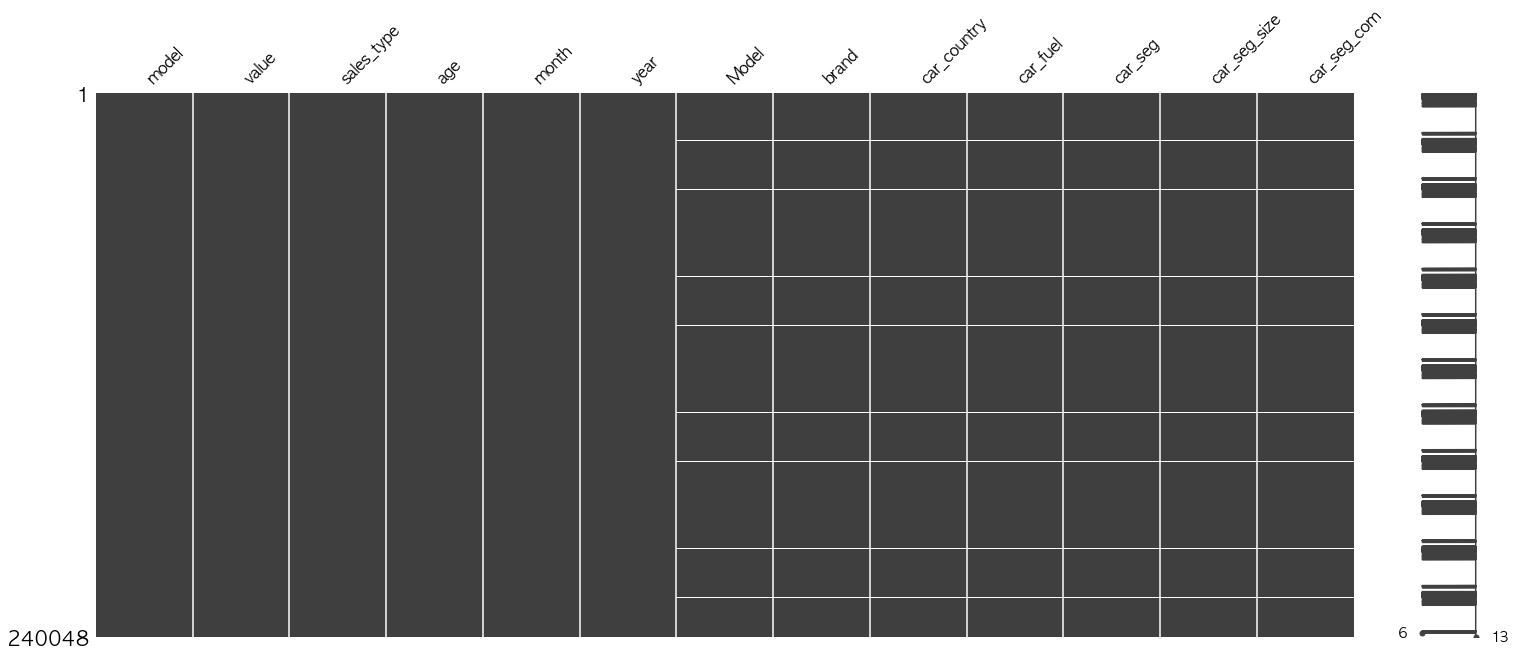

In [58]:
import missingno as msno
msno.matrix(kaida_dem)
plt.show()

In [ ]:
# 데이터의 하자로 merge해서 사용하기 힘들지만, 제대로 합쳤다고 가정하고 진행

In [27]:
# 주요 연령대는 어떤 세그먼트를 많이 샀는가.(한 그래프에 여러개 볼 수 있게)

In [64]:
kaida_dem

,model,value,sales_type,age,month,year,Model,brand,car_country,car_fuel,car_seg,car_seg_size,car_seg_com
0,218dGranCoupe,0,개인-남자,10,1,2021,218d,BMW,독일,디젤,준중형,세단,performance_b
1,520,1,개인-남자,10,1,2021,BMW5,BMW,독일,가솔린,준대형,세단,performance_e
2,ContinentalGTV8,0,개인-남자,10,1,2021,ContinentalGT,Bentley,영국,가솔린,대형,쿠페,performance_sa
3,CR-VHybrid,0,개인-남자,10,1,2021,CR-V,Honda,일본,가솔린,준중형,SUV,mobility_d
4,E250,1,개인-남자,10,1,2021,EClass,Mercedes-Benz,독일,가솔린,준대형,세단,performance_e
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240043,XC70D4,0,법인,0,12,2016,XC70,Volvo,스웨덴,디젤,준대형,SUV,family_e
240044,XC70D5,0,법인,0,12,2016,XC70,Volvo,스웨덴,디젤,준대형,SUV,family_e
240045,XC90D5AWD,34,법인,0,12,2016,XC90,Volvo,스웨덴,하이브리드,준대형,SUV,family_e
240046,XC90T6AWD,11,법인,0,12,2016,XC90,Volvo,스웨덴,하이브리드,준대형,SUV,family_e


In [ ]:
# 연료타입

In [ ]:
# 주요 연령대는 어떤 차량타입을 많이 샀는가.